In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [117]:
df_1 = pd.read_csv('values.csv') 
df_1.head(5)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [118]:
df_2 = pd.read_csv('labels.csv')
df_2.head(5)

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


## MERGING DATAFRAMES

In [119]:
df_3 = pd.merge(df_1,df_2,on='patient_id')
df_3.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [120]:
df_3

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


## Exploratory Data Analysis

In [121]:
df_3.shape

(180, 15)

In [123]:
df_4= df_3.drop(['patient_id'], axis=1)
df_4.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [124]:
df_4.shape

(180, 14)

In [125]:
df_4.isnull().sum()

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [126]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    object 
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    int64  
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

In [127]:
df_4.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [128]:
df_4.thal.unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

* we observed that thal Dtype is non-numeric . hence converting it into numeric value

### Label encoding assigns a unique integer to each unique value in the column.

In [129]:
from sklearn.preprocessing import LabelEncoder

In [130]:
LE = LabelEncoder()

In [131]:
df_4['thal'] = LE.fit_transform(df_4['thal'])

In [132]:
df_4['thal']

0      1
1      1
2      1
3      2
4      2
      ..
175    2
176    1
177    2
178    1
179    1
Name: thal, Length: 180, dtype: int32

In [133]:
df_4.thal.value_counts()

thal
1    98
2    74
0     8
Name: count, dtype: int64

In [134]:
df_4.describe()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,1.366667,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,0.568247,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,0.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,2.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [135]:
# checking the distribution of Target Variable
df_4['heart_disease_present'].value_counts()

heart_disease_present
0    100
1     80
Name: count, dtype: int64

## Univariate Analysis

In [45]:
!pip install sweetviz

In [136]:
import sweetviz as sv

In [137]:
report = sv.analyze(df_4)

                                             |          | [  0%]   00:00 -> (? left)

In [138]:
report.show_html('sweetviz_report.html')

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Bivariate Analysis

In [139]:
df_4

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,2,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,1,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,2,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,1,124,3,2,1,0,255,0.0,1,48,175,0,0


In [140]:
data1 = df_4.rename(columns={'heart_disease_present':'Target'})

In [141]:
data1

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,Target
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,2,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,1,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,2,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,1,124,3,2,1,0,255,0.0,1,48,175,0,0


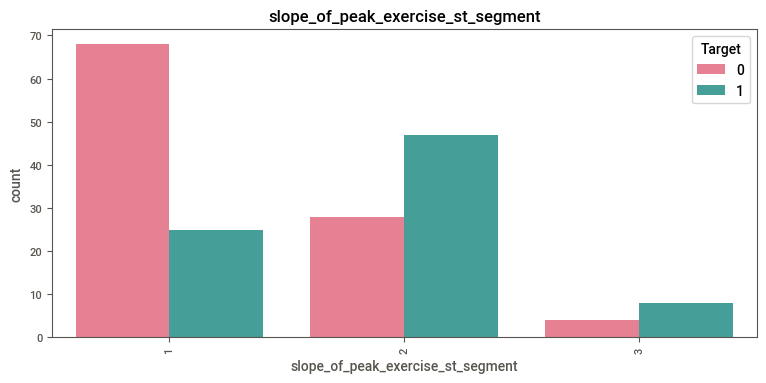

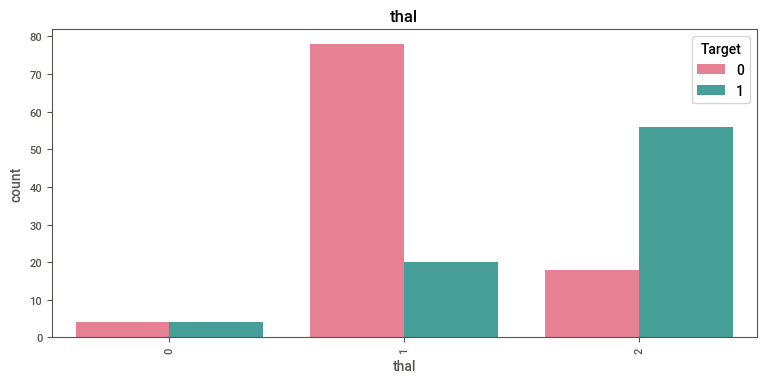

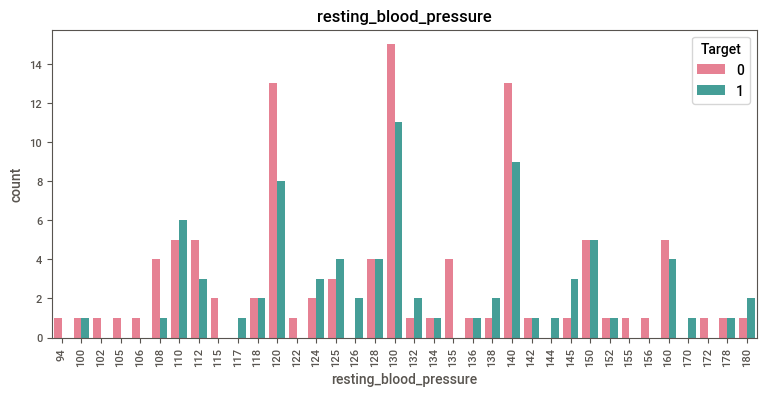

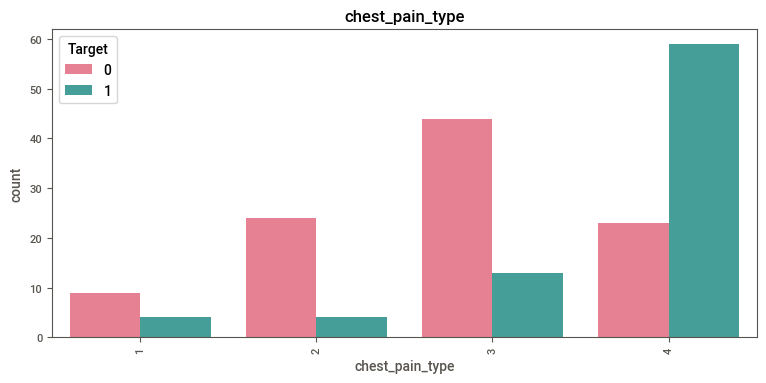

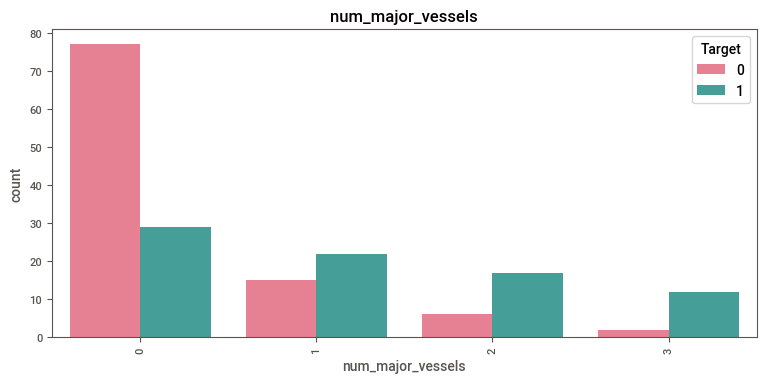

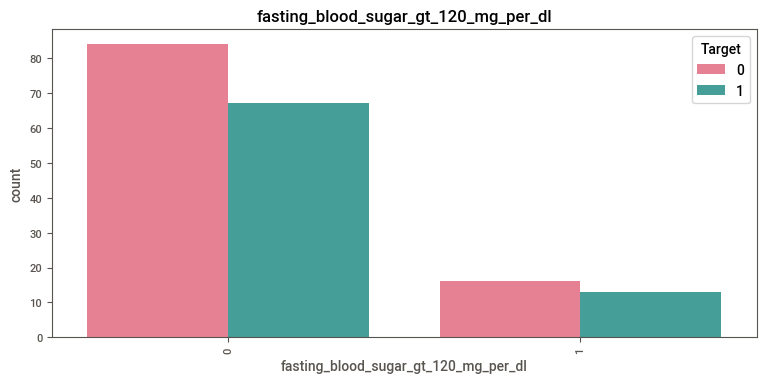

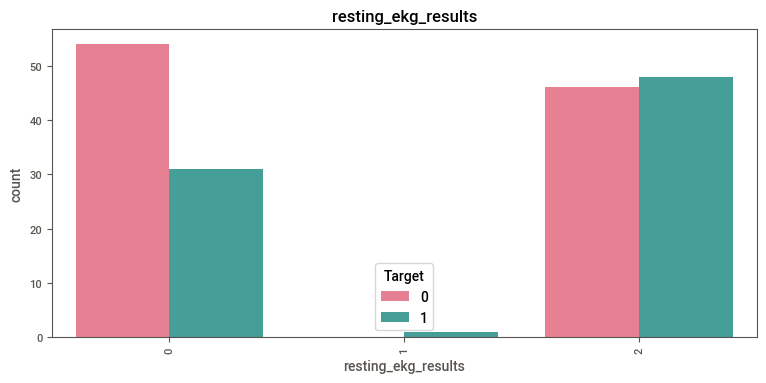

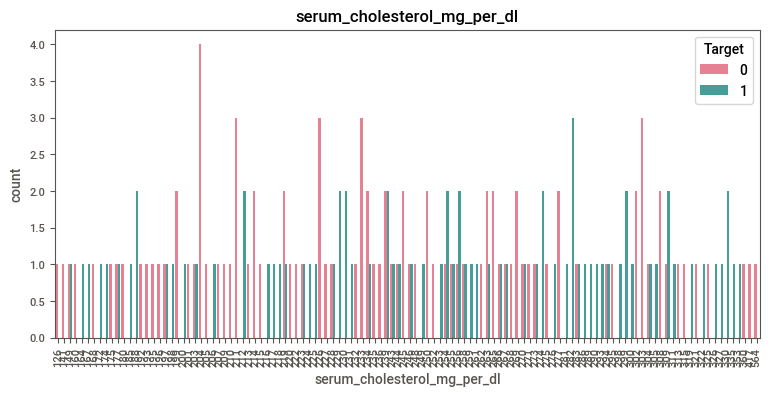

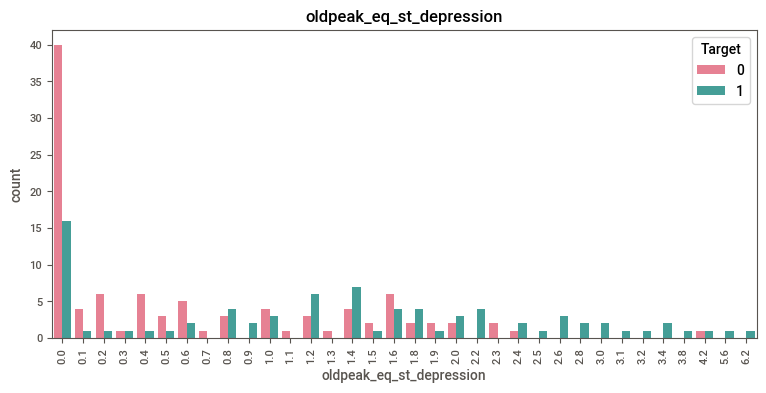

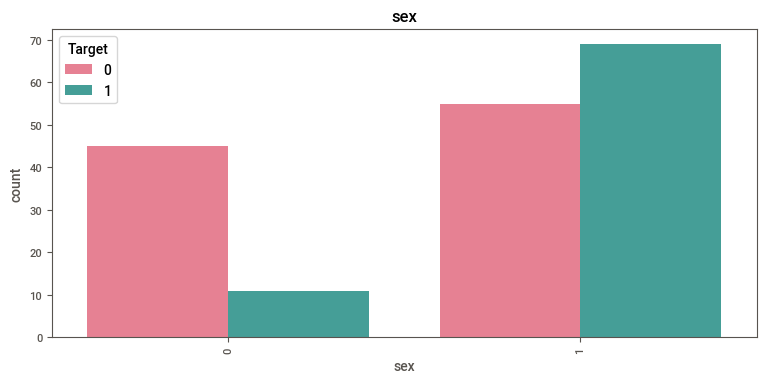

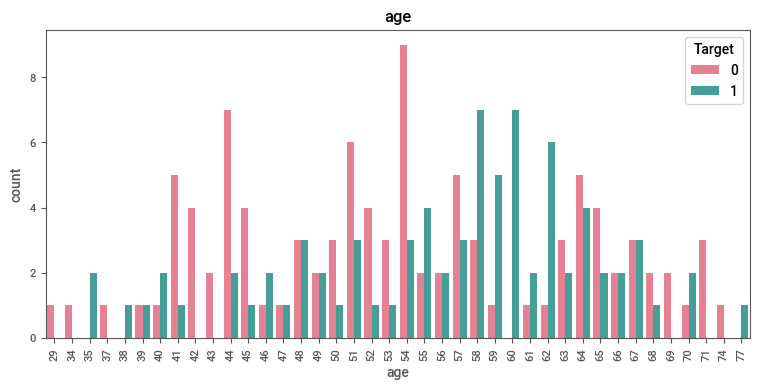

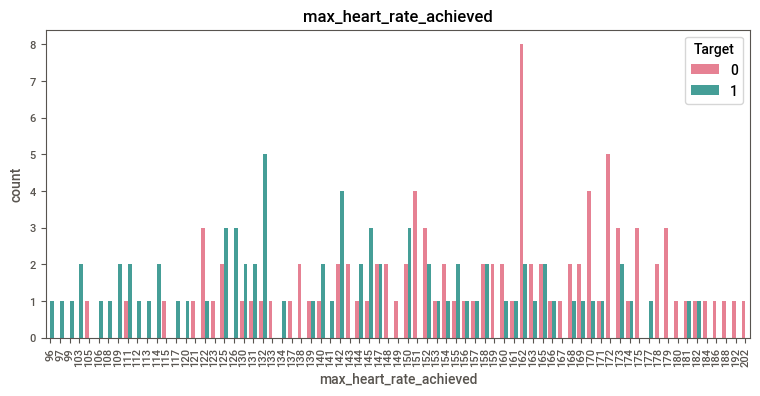

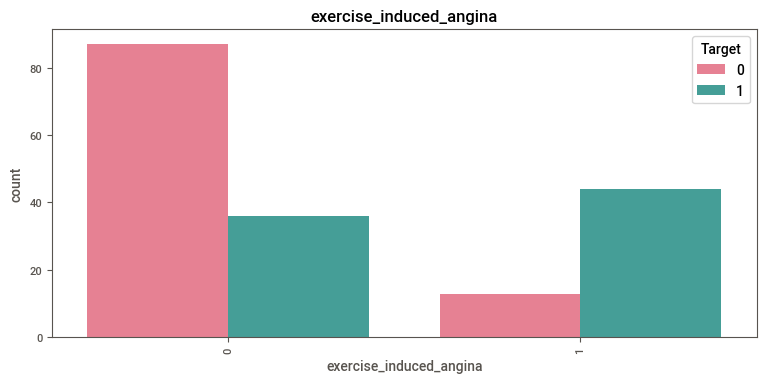

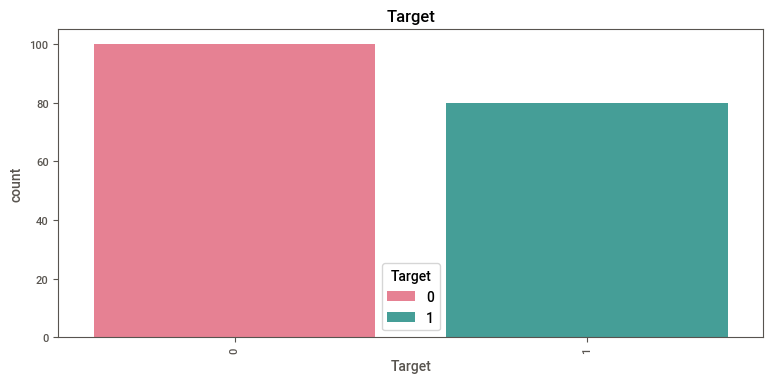

In [142]:
# Setting a color palette with different colors for each bar
palette = sns.color_palette("husl", n_colors=len(data1['Target'].unique()))

# Plotting a count plot for each categorical variable with different colors
for column in data1:
    plt.figure(figsize=(20, 4))
    plt.subplot(121)
    sns.countplot(x=data1[column], hue=data1['Target'], data=data1, palette=palette)
    plt.title(column)
    plt.xticks(rotation=90)
    plt.show()

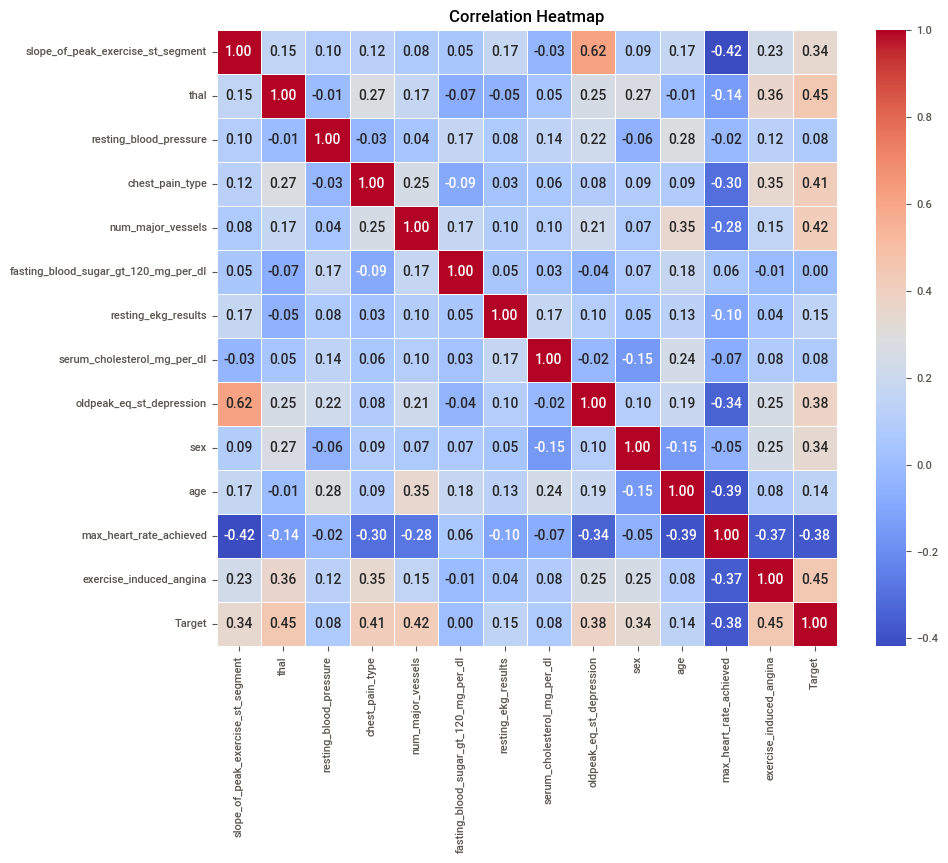

In [143]:
numeric_columns = data1.select_dtypes(include='number')

correlation_matrix = numeric_columns.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Multivariate Analysis

array([[<Axes: title={'center': 'slope_of_peak_exercise_st_segment'}>,
        <Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'resting_blood_pressure'}>],
       [<Axes: title={'center': 'chest_pain_type'}>,
        <Axes: title={'center': 'num_major_vessels'}>,
        <Axes: title={'center': 'fasting_blood_sugar_gt_120_mg_per_dl'}>],
       [<Axes: title={'center': 'resting_ekg_results'}>,
        <Axes: title={'center': 'serum_cholesterol_mg_per_dl'}>,
        <Axes: title={'center': 'oldpeak_eq_st_depression'}>],
       [<Axes: title={'center': 'sex'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'max_heart_rate_achieved'}>],
       [<Axes: title={'center': 'exercise_induced_angina'}>,
        <Axes: title={'center': 'Target'}>, <Axes: >]], dtype=object)

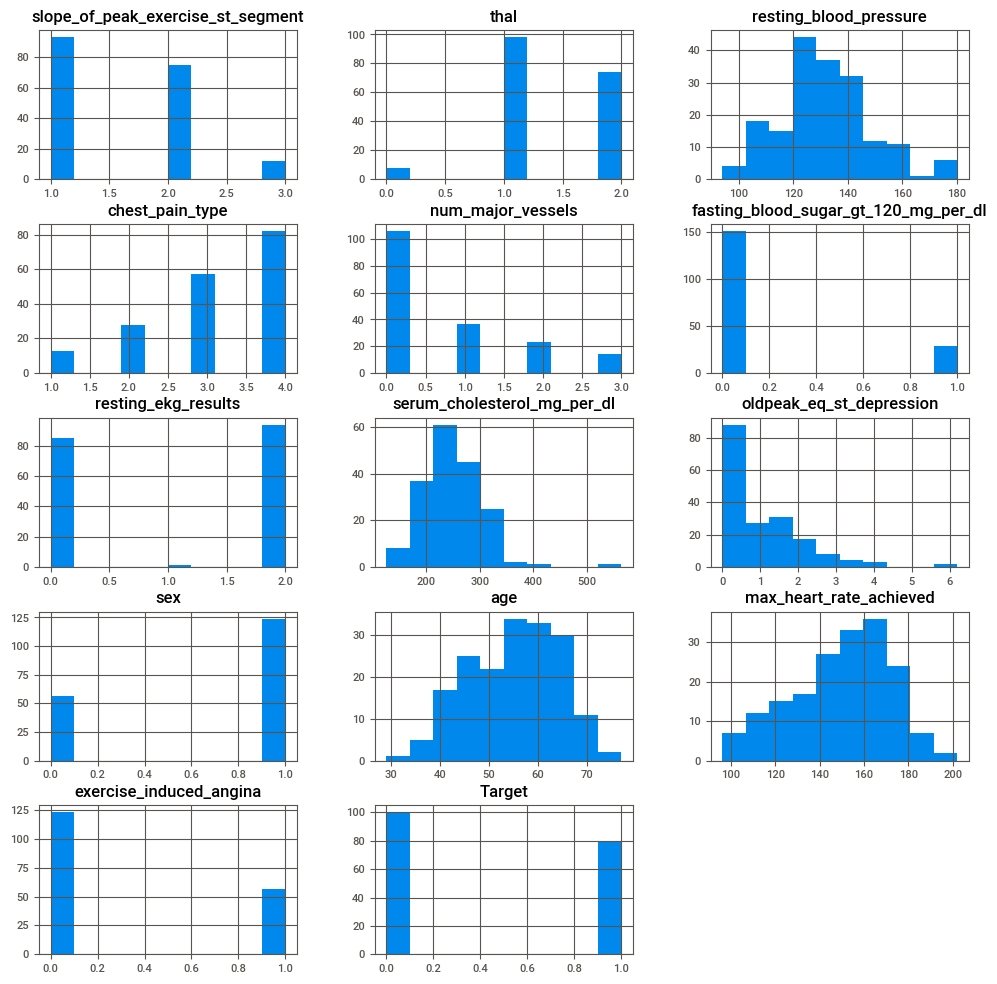

In [144]:
data1.hist(figsize=(12,12), layout=(5,3))

### Outlier Handling

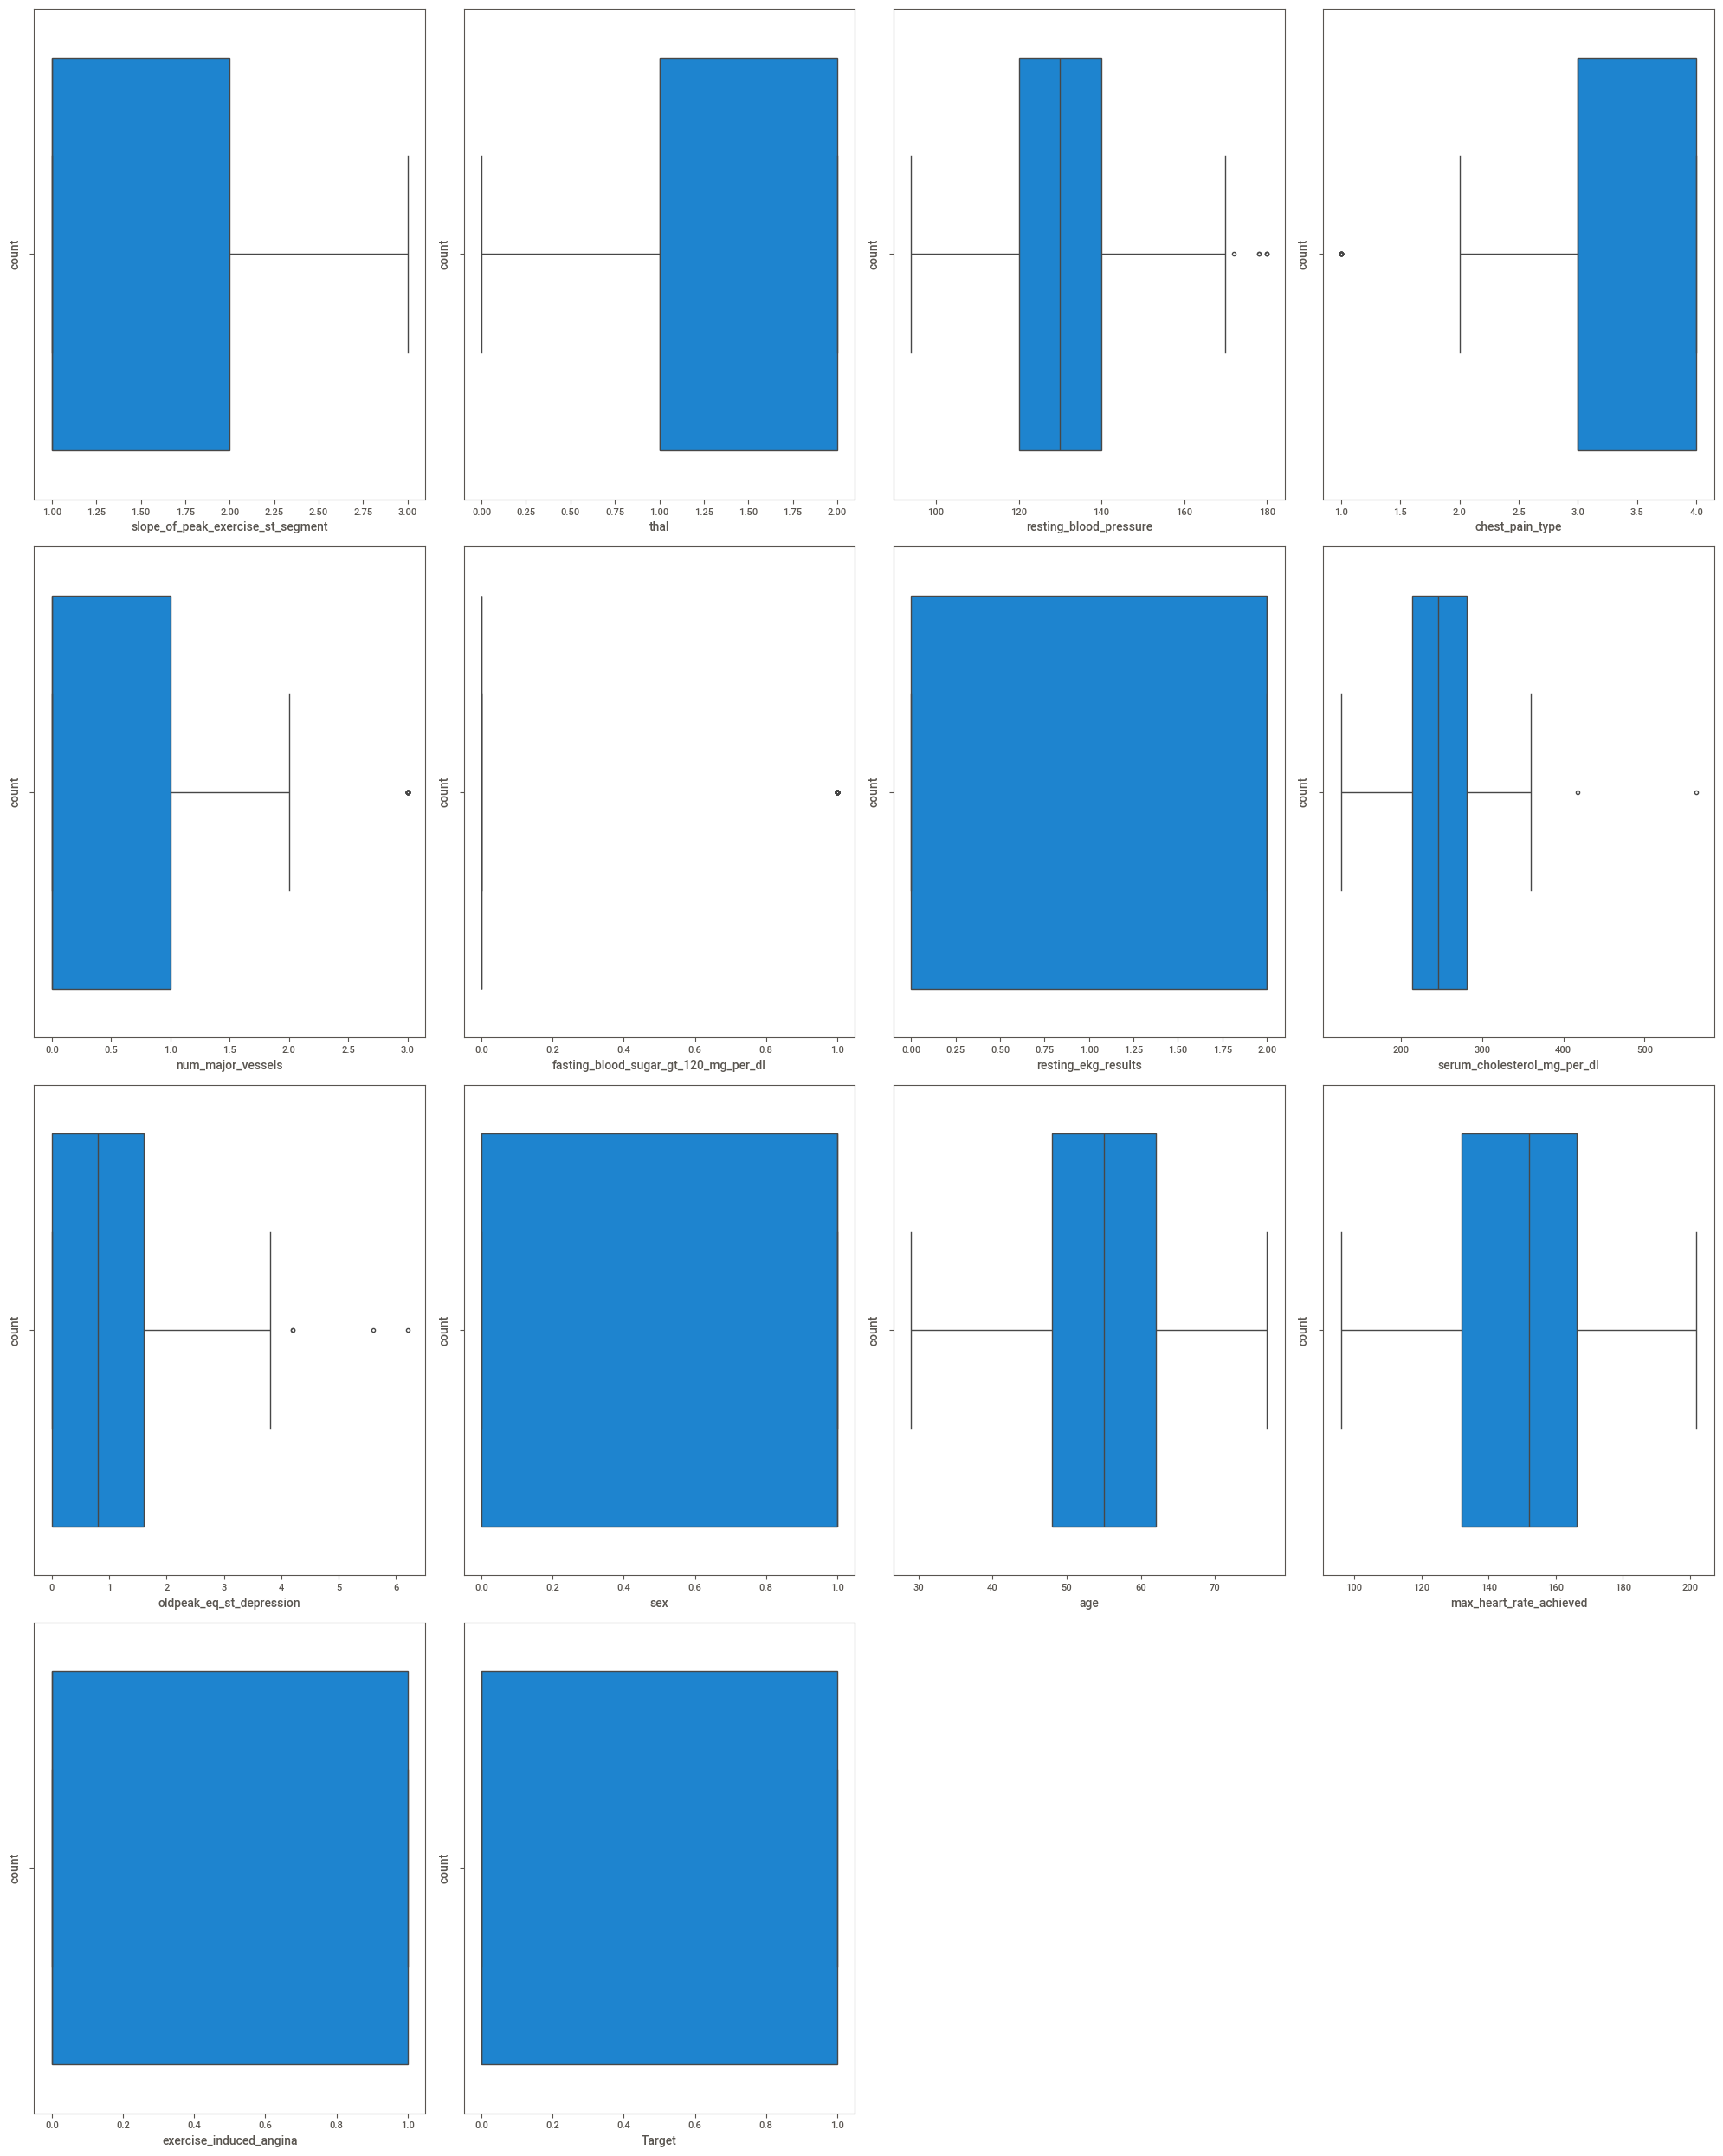

In [145]:
plt.figure(figsize=(20, 25))
plotnumber = 1

for column in data1.columns:  # Use data.columns to iterate over column names
    if plotnumber <= 14:
        ax = plt.subplot(4, 4, plotnumber)
        sns.boxplot(x=data1[column])  # Use x=data[column] to specify the column for boxplot
        plt.xlabel(column)
        plt.ylabel('count')
    plotnumber += 1

plt.tight_layout()
plt.show()

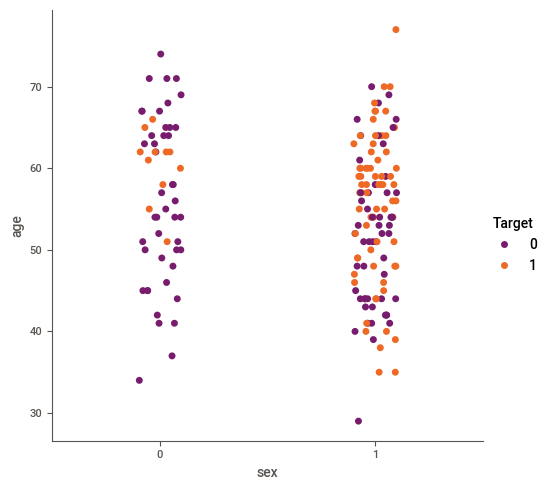

In [146]:
sns.catplot(data=data1, x='sex', y='age',  hue='Target', palette='inferno')

<Axes: xlabel='sex', ylabel='serum_cholesterol_mg_per_dl'>

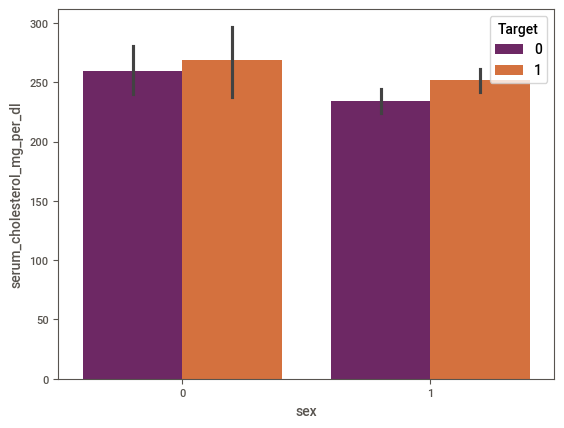

In [147]:
sns.barplot(data=data1, x='sex', y='serum_cholesterol_mg_per_dl', hue='Target', palette='inferno')

In [148]:
data1['sex'].value_counts()

sex
1    124
0     56
Name: count, dtype: int64

* 124 Males
* 56 Females

<Axes: xlabel='sex', ylabel='count'>

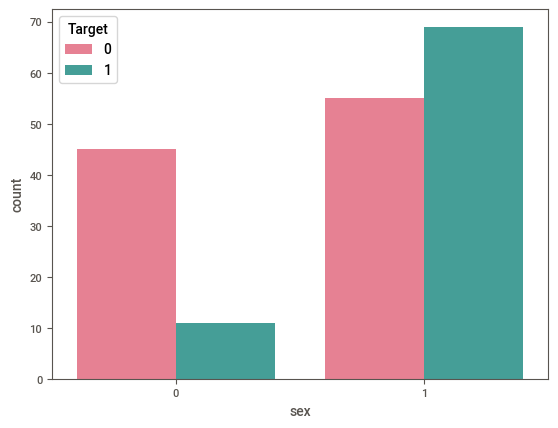

In [149]:
sns.countplot(x='sex', data=data1, palette='husl', hue='Target')

* Here 0 represents Female and 1 represents males.
* In the given data set males as compared to females suffers more from heart disease

<Axes: xlabel='Target', ylabel='count'>

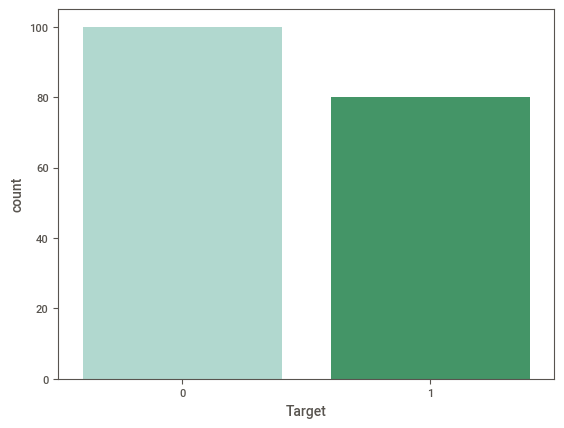

In [150]:
sns.countplot(x='Target',palette='BuGn', data=data1)

* We observe that the counts for individuals without heart disease and those with heart disease are nearly balanced.
* Specifically, there are 100 individuals without heart disease and 80 individuals with heart disease.

<Axes: xlabel='num_major_vessels', ylabel='count'>

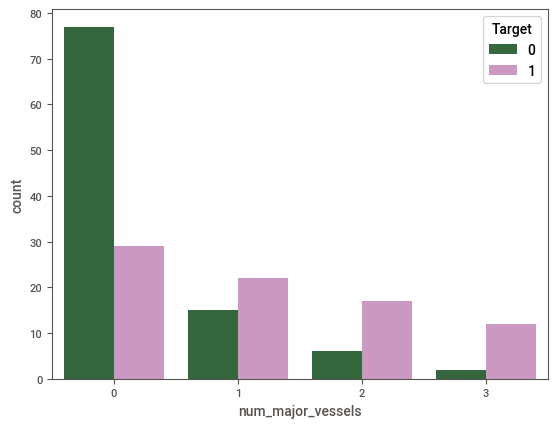

In [151]:
sns.countplot(x='num_major_vessels',hue='Target',data=data1, palette='cubehelix')

In [152]:
df['num_major_vessels'].value_counts()

num_major_vessels
0    106
1     37
2     23
3     14
Name: count, dtype: int64

<Axes: xlabel='thal', ylabel='count'>

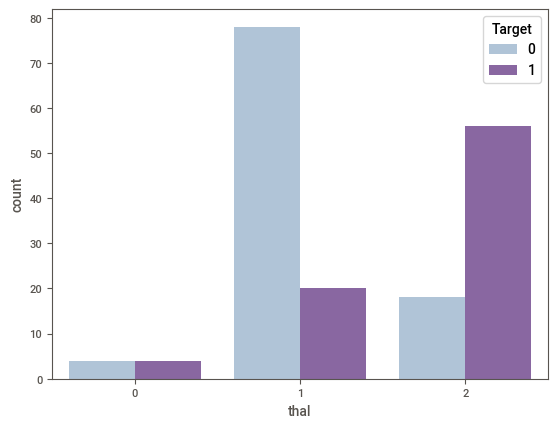

In [153]:
sns.countplot(x='thal',data=data1, hue='Target', palette='BuPu' )

## Scaling the data

In [155]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = data1.select_dtypes(include=['int', 'float']).columns.drop('Target')

scaler = MinMaxScaler()
data1[numeric_columns] = scaler.fit_transform(data1[numeric_columns])

In [156]:
data1

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,Target
0,0.0,0.5,0.395349,0.333333,0.000000,0.0,1.0,0.415525,0.000000,1.0,0.333333,0.698113,0.0,0
1,0.5,0.5,0.186047,0.666667,0.000000,0.0,0.0,0.200913,0.258065,0.0,0.520833,0.584906,0.0,0
2,0.0,0.5,0.360465,1.000000,1.000000,0.0,1.0,0.406393,0.000000,1.0,1.000000,0.622642,1.0,1
3,0.0,1.0,0.674419,1.000000,0.000000,0.0,0.0,0.221461,0.000000,1.0,0.229167,0.801887,0.0,1
4,1.0,1.0,0.976744,0.000000,0.000000,0.0,1.0,0.328767,0.677419,1.0,0.625000,0.462264,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.5,1.0,0.360465,1.000000,0.666667,1.0,0.0,0.292237,0.032258,1.0,0.791667,0.632075,0.0,1
176,0.5,0.5,1.000000,1.000000,0.000000,0.0,0.5,0.458904,0.548387,0.0,0.541667,0.198113,1.0,1
177,0.5,1.0,0.360465,0.666667,0.000000,0.0,0.0,0.417808,0.290323,1.0,0.729167,0.330189,1.0,1
178,0.0,0.5,0.348837,0.666667,0.666667,1.0,0.0,0.294521,0.000000,1.0,0.395833,0.745283,0.0,0


## Target And Features

In [157]:
X = data1.iloc[:,:-1]
y =  data1.Target

In [158]:
X.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina'],
      dtype='object')

In [159]:
y

0      0
1      0
2      1
3      1
4      0
      ..
175    1
176    1
177    1
178    0
179    0
Name: Target, Length: 180, dtype: int64

## Model Training

In [160]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=25)

In [163]:
print('X_train->', X_train.size,'\n')
print('X_test->',X_test.size,'\n')
print('y_train->', y_train.size,'\n')
print('y_test->', y_test.size,'\n')

X_train-> 1872 

X_test-> 468 

y_train-> 144 

y_test-> 36 



## 1) LogisticRegression

In [165]:
lr = LogisticRegression()
lr

LogisticRegression()

In [166]:
lr.fit(X_train, y_train)

LogisticRegression()

In [168]:
lr_train_predict=lr.predict(X_train)
lr_train_predict

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [169]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, classification_report, f1_score

f1score=f1_score(y_train,lr_train_predict)
f1score

0.7899159663865546

In [173]:
recall=recall_score(y_train,lr_train_predict)
recall

0.734375

In [171]:
cr=classification_report(y_train,lr_train_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        80
           1       0.85      0.73      0.79        64

    accuracy                           0.83       144
   macro avg       0.83      0.82      0.82       144
weighted avg       0.83      0.83      0.82       144



### Testing score

In [175]:
y_pred=lr.predict(X_test)

y_pred_prob=lr.predict_proba(X_test)

y_pred_prob

array([[0.35312995, 0.64687005],
       [0.79212047, 0.20787953],
       [0.76906343, 0.23093657],
       [0.35721794, 0.64278206],
       [0.1935449 , 0.8064551 ],
       [0.16658748, 0.83341252],
       [0.18777252, 0.81222748],
       [0.30931014, 0.69068986],
       [0.79700625, 0.20299375],
       [0.68824082, 0.31175918],
       [0.87706298, 0.12293702],
       [0.02422552, 0.97577448],
       [0.79207331, 0.20792669],
       [0.96676388, 0.03323612],
       [0.4589043 , 0.5410957 ],
       [0.94242665, 0.05757335],
       [0.12421031, 0.87578969],
       [0.63272291, 0.36727709],
       [0.43260705, 0.56739295],
       [0.32578372, 0.67421628],
       [0.36257458, 0.63742542],
       [0.90111639, 0.09888361],
       [0.30705387, 0.69294613],
       [0.19109442, 0.80890558],
       [0.0447881 , 0.9552119 ],
       [0.32397213, 0.67602787],
       [0.85335113, 0.14664887],
       [0.92210235, 0.07789765],
       [0.70767851, 0.29232149],
       [0.89467559, 0.10532441],
       [0.

In [176]:
pd.crosstab(y_pred,y_test)

Target,0,1
row_0,,
0,16,0
1,4,16


In [184]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score,ConfusionMatrixDisplay

In [177]:
recall=recall_score(y_test,y_pred)
recall

1.0

In [178]:
precision=precision_score(y_test,y_pred)
precision

0.8

In [179]:
f1score=f1_score(y_test,y_pred)
f1score

0.8888888888888888

In [180]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        20
           1       0.80      1.00      0.89        16

    accuracy                           0.89        36
   macro avg       0.90      0.90      0.89        36
weighted avg       0.91      0.89      0.89        36



In [182]:
from sklearn.model_selection import cross_val_score,StratifiedKFold

cross_val = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(lr, X_test, y_test, scoring='precision', cv=cross_val, n_jobs=-1)

for index, score in enumerate(scores):
    print('Iteration {} f1 score: {}'.format(index + 1, score))
    
print('\nMean f1: {}'.format(np.mean(scores)))

Iteration 1 f1 score: 1.0
Iteration 2 f1 score: 1.0
Iteration 3 f1 score: 1.0
Iteration 4 f1 score: 1.0
Iteration 5 f1 score: 1.0
Iteration 6 f1 score: 1.0
Iteration 7 f1 score: 1.0
Iteration 8 f1 score: 0.0
Iteration 9 f1 score: 1.0
Iteration 10 f1 score: 1.0

Mean f1: 0.9


              precision    recall  f1-score   support

           0       1.00      0.80      0.89        20
           1       0.80      1.00      0.89        16

    accuracy                           0.89        36
   macro avg       0.90      0.90      0.89        36
weighted avg       0.91      0.89      0.89        36



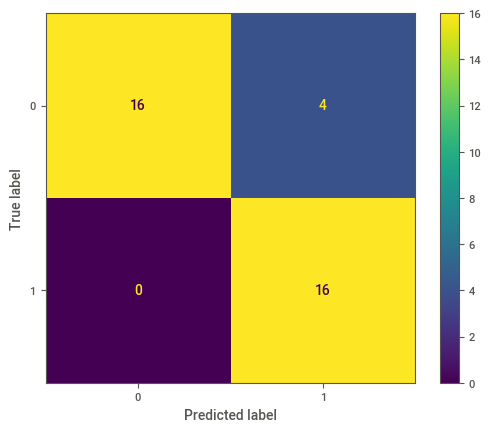

In [185]:
testing_predictions = lr.predict(X_test)

print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=lr.classes_)
display.plot()

* Logistic Reggression can be a good model with an accuracy and recall score of 89% and 100% respectively and precision score of 80%

## Support Vector Classifier Model

In [186]:
# Support Vector Classifier Model

from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_train, y_train)#traning of the classifier

SVC()

In [187]:
# Predict output for X_test
y_hat1=svclassifier.predict(X_test)
y_hat1

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [188]:
## evaluating the model created
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc_svm=accuracy_score(y_test,y_hat1)
acc_svm

0.9444444444444444

In [189]:
recall_svm=recall_score(y_test,y_hat1)
recall_svm

1.0

In [190]:
# F-score helps to measure Recall and Precision at the same time. 
f1=f1_score(y_test,y_hat1)
f1

0.9411764705882353

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.89      1.00      0.94        16

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



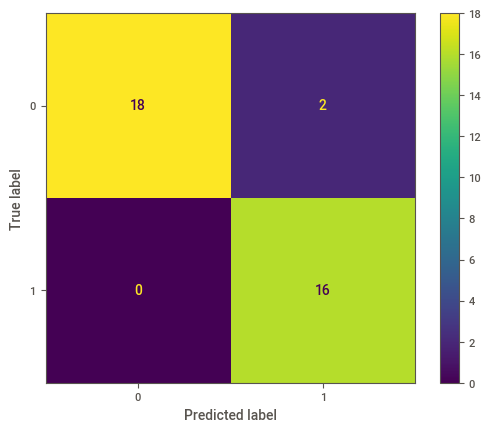

In [191]:
testing_predictions = svclassifier.predict(X_test)

print(classification_report(y_test,y_hat1))

cm = confusion_matrix(y_test, y_hat1, labels=svclassifier.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=svclassifier.classes_)
display.plot()

 * True Negative (TN): 18

* False Positive (FP): 2

* False Negative (FN): 0

* True Positive (TP): 16
 
  ### The SVC model is working good, there are no False Negatives (FN = 0), prediction with precision of 100% and accuracy of 94%

## KNN

In [192]:
from sklearn.neighbors import KNeighborsClassifier#USING KNN

error_rate = []
# Will take some time
for i in range(1,11):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    pred_i = KNN.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [197]:
KNN1=KNeighborsClassifier() ## model object creation
KNN1.fit(X_train,y_train)  ## fitting the model


y_hat_knn=KNN1.predict(X_test)

y_predict_KNN=KNN.predict(X_test)

### Traning score

In [198]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score
y_train_KNN=KNN.predict(X_train)
f1_train=f1_score(y_train,y_train_KNN)
f1_train

0.7068965517241379

In [199]:
## Checking the outputs
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score
f1_KNN=f1_score(y_test,y_predict_KNN)
f1_KNN

0.9032258064516129

In [200]:
re_KNN=recall_score(y_test,y_predict_KNN)
re_KNN

0.875

In [201]:
pr_KNN=precision_score(y_test,y_predict_KNN)
pr_KNN

0.9333333333333333

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        20
           1       0.93      0.88      0.90        16

    accuracy                           0.92        36
   macro avg       0.92      0.91      0.92        36
weighted avg       0.92      0.92      0.92        36



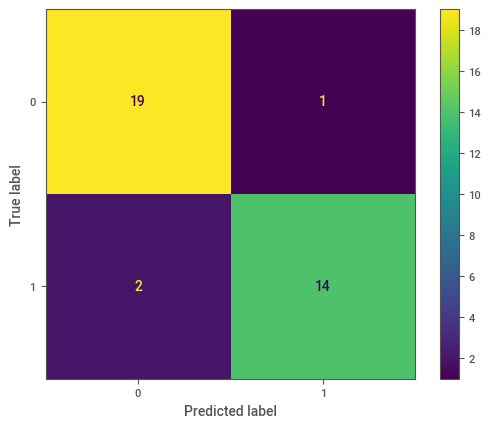

In [203]:
testing_predictions = KNN.predict(X_test)

print(classification_report(y_test,y_predict_KNN))

cm = confusion_matrix(y_test, y_predict_KNN, labels=KNN.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=KNN.classes_)
display.plot()

### The KNN model shows there are 2 False Negatives (FN = 2), which means the model incorrectly identified 2 instances of the positive class (those with the condition) as negative.
### So, the model did miss some instances of the positive class. 
* with precision of 93% and accuracy of 92% we can consider KNN as a good model

## Decision Tree

In [204]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree

dt=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf= 1, min_samples_split= 3, splitter= 'random')#object creation for decision tree  
dt.fit(X_train,y_train)#training the model
y_DT=dt.predict(X_test)#prediction
y_DT#predicted values 

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

Testing Accuracy: 0.7777777777777778
F1 Score: 0.7777777777777778
Recall: 0.875
Precision: 0.7
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        20
           1       0.70      0.88      0.78        16

    accuracy                           0.78        36
   macro avg       0.79      0.79      0.78        36
weighted avg       0.80      0.78      0.78        36



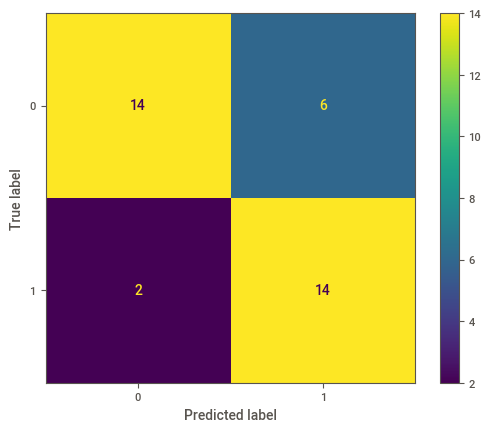

In [206]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Calculate testing accuracy
test_acc = accuracy_score(y_test, y_DT)
print("Testing Accuracy:", test_acc)

# Calculate F1 score
test_f1 = f1_score(y_test, y_DT)
print("F1 Score:", test_f1)

# Calculate recall
test_recall = recall_score(y_test, y_DT)
print("Recall:", test_recall)

# Calculate precision
precision2 = precision_score(y_test, y_DT)
print("Precision:", precision2)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_DT))

# Generate confusion matrix and display it
cm = confusion_matrix(y_test, y_DT, labels=dt.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
display.plot()
plt.show()


* True Positive (TP): 14
* True Negative (TN): 14
* False Positive (FP): 6
* False Negative (FN): 2
  *
* Decision Tree model shows 2 FN and 6 FP value , with precision of 70% and accuracy of 78%

## Hyperparameter Tunning

In [207]:
from sklearn.model_selection import GridSearchCV #logic is inner and outer loop
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}
tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, 
                       verbose=3, cv=3)
tree_cv.fit(X_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'best'})


In [208]:
#fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Bestparamters: ({'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'})


dt1=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf= 1,min_samples_split=2,splitter='random')#passing best parameter to decision tree


dt1.fit(X_train,y_train)#traing model with best parameter

DecisionTreeClassifier(max_depth=5, splitter='random')

Predictions: [0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0]
Testing Accuracy: 0.8888888888888888
Recall: 0.875
Precision: 0.875
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.88      0.88      0.88        16

    accuracy                           0.89        36
   macro avg       0.89      0.89      0.89        36
weighted avg       0.89      0.89      0.89        36



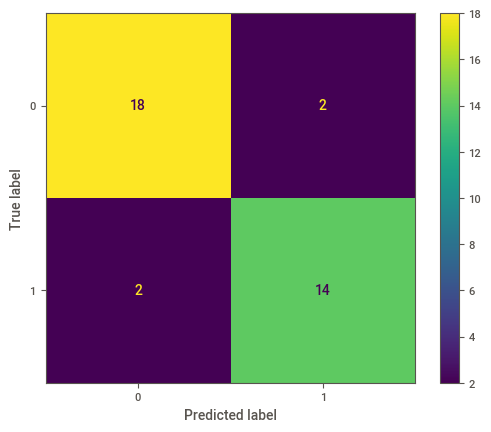

In [210]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predicting
y_hat1 = dt1.predict(X_test)
print("Predictions:", y_hat1)

# Checking accuracy
acc_test = accuracy_score(y_test, y_hat1)
print("Testing Accuracy:", acc_test)

# Checking recall
R = recall_score(y_test, y_hat1)
print("Recall:", R)

# Checking precision
P = precision_score(y_test, y_hat1)
print("Precision:", P)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_hat1))

# Generate confusion matrix and display it
cm = confusion_matrix(y_test, y_hat1, labels=dt.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
display.plot()
plt.show()


* After hyperparameter tunning  score are seen. It shows 2 FN and 2 FP value , with precision of 88% and accuracy of 89%

## RandomForest Implementation

F1 Score: 0.7647058823529411
Recall: 0.8125
Precision: 0.7222222222222222
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.72      0.81      0.76        16

    accuracy                           0.78        36
   macro avg       0.78      0.78      0.78        36
weighted avg       0.78      0.78      0.78        36



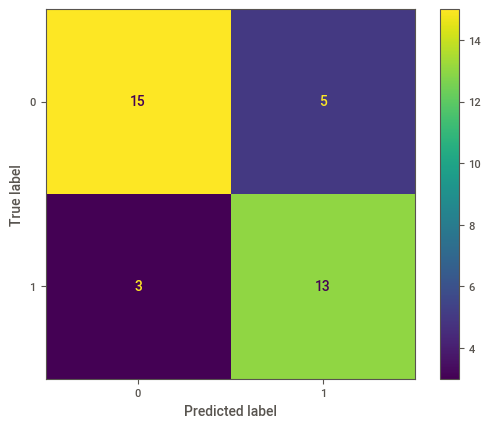

In [211]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Importing RandomForest
rf_clf = RandomForestClassifier(n_estimators=100)  # Object creation, taking 100 decision trees in Random Forest
rf_clf.fit(X_train, y_train)  # Training the data

# Predicting
yy_predict = rf_clf.predict(X_test)

# Checking F1 score
f_Score = f1_score(y_test, yy_predict)
print("F1 Score:", f_Score)

# Checking recall
test = recall_score(y_test, yy_predict)
print("Recall:", test)

# Checking precision
PS = precision_score(y_test, yy_predict)
print("Precision:", PS)

# Generating classification report
print("Classification Report:")
print(classification_report(y_test, yy_predict))

# Generating confusion matrix and displaying it
cm = confusion_matrix(y_test, yy_predict, labels=rf_clf.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
display.plot()
plt.show()


* Random Forest model shows precision of 72% and accuracy of 78%

## Hyperparameter Tuning

In [212]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=400, stop=3000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(X_train, y_train)##training data on randomsearch cv
rf_best_params = rf_cv.best_params_##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 688, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False})


Recall: 0.8125
Precision: 0.7222222222222222
F1 Score: 0.7647058823529411
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.72      0.81      0.76        16

    accuracy                           0.78        36
   macro avg       0.78      0.78      0.78        36
weighted avg       0.78      0.78      0.78        36



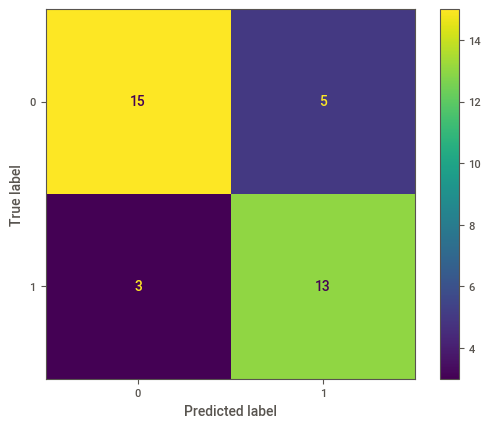

In [215]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Passing best parameters to RandomForest
rf_clf2 = RandomForestClassifier(n_estimators=977, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', max_depth=80, bootstrap=True)
rf_clf2.fit(X_train, y_train)  # Training the model

# Predicting
y_predict = rf_clf2.predict(X_test)

# Checking recall
RECALL = recall_score(y_test, y_predict)
print("Recall:", RECALL)

# Checking precision
PRE = precision_score(y_test, y_predict)
print("Precision:", PRE)

# Checking F1 score
f_score1 = f1_score(y_test, y_predict)
print("F1 Score:", f_score1)

# Generating classification report
print("Classification Report:")
print(classification_report(y_test, y_predict))

# Generating confusion matrix and displaying it
cm = confusion_matrix(y_test, y_predict, labels=rf_clf2.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf2.classes_)
display.plot()
plt.show()


# Summary:
* Logistic Regression: The model has a good recall (1.0) and a decent precision (0.8), resulting in an F1 score of 0.89. However, it has a few false positives (FP = 4).

* Support Vector Classifier (SVC): This model performs better with higher precision (0.9) and recall (1.0), resulting in an F1 score of 0.95. It has fewer false positives (FP = 2) compared to Logistic Regression.

### Overall, the SVC model appears to be performing better than the Logistic Regression model, with higher accuracy, precision, and F1 score, and fewer false positives. However, both models have no false negatives, which is a positive aspect.